In [1]:
#%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, fftpack
import dataloader
import sklearn.preprocessing as prep
%matplotlib inline
np.set_printoptions(suppress=True)

#helper functions
def print_time(unix, msg=''):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(9,9))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.show()

dataloader.USE_TWITTER = True
dataloader.USE_BLOCKCHAIN = True
#dataloader.download_data()
#dataloader.
data = dataloader.load_data()

In [3]:
data['date'].iloc[-1]

print_time(data['date'].iloc[-1])

 Sat Jun 30 22:00:00 2018


In [9]:
data['date'].iloc[0]

1451609700

In [7]:
print_time(1531163602)

 Mon Jul  9 21:13:22 2018


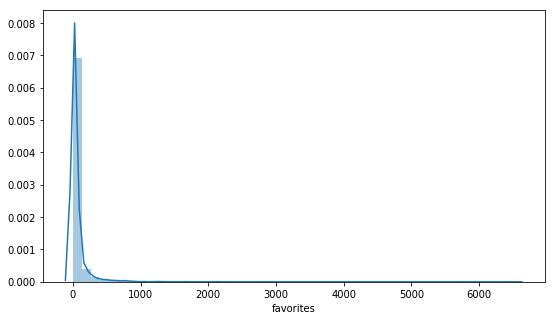

In [2]:
f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(data['favorites'])

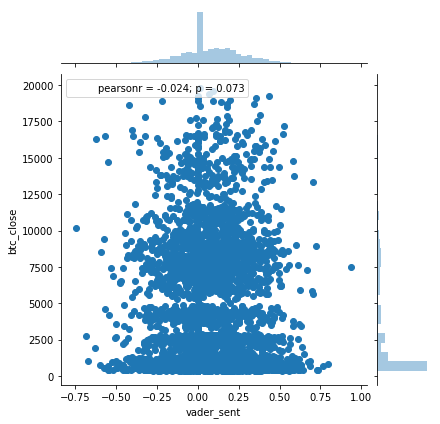

In [3]:
#f, ax = plt.subplots(figsize=(9, 5))
sns.jointplot(x="vader_sent", y="btc_close", data=data)

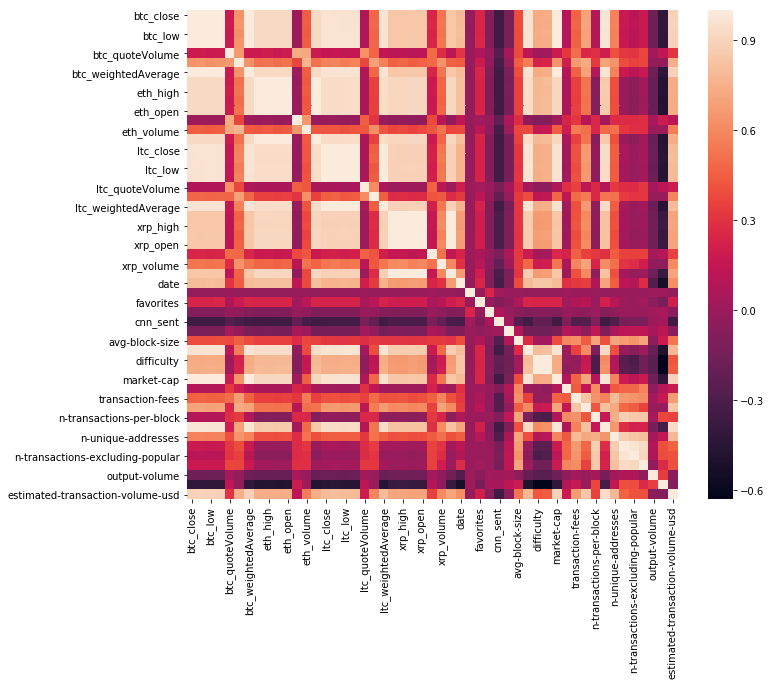

In [4]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat)

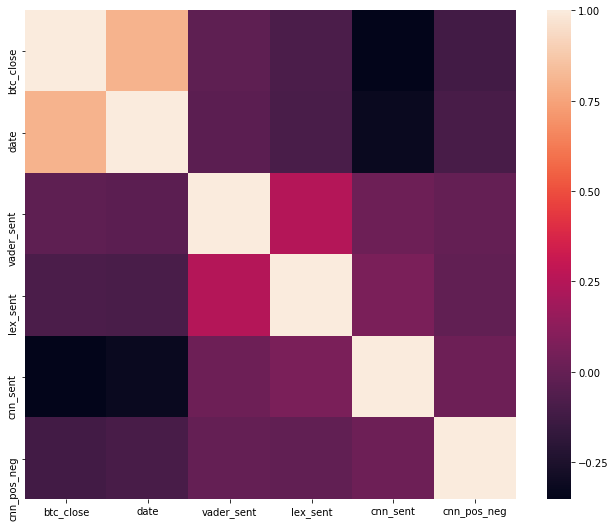

In [5]:
fields = ['btc_close', 'date', 'vader_sent', 'lex_sent', 'cnn_sent', 'cnn_pos_neg']
corrmat = data[fields].corr()
f, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat)

In [13]:
a = np.array([1,2,3,4,5,9])
np.diff(a)


array([1, 1, 1, 1, 4])

In [ ]:
import sklearn.preprocessing as prep

df = data[100000:100005]
df


In [ ]:

scaler = prep.MinMaxScaler()
df_trans = scaler.fit_transform(df)
df_trans

In [ ]:
#236422
#227494
s = "01/03/2018"
split_time = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())
data.query('date<=@split_time').info()

In [12]:
np.arange(10) + np.arange(10, step=5).reshape(-1,1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]])

In [129]:
ps = dataloader.PastSampler(288, 48, sliding_window=False, step_size=5)
xx, yy = ps.transform(data.as_matrix()[:,None,:])
print(xx.shape, yy.shape)

dfff = pd.DataFrame(xx)
dfff.info()

(703, 288, 29) (703, 48, 1)


ValueError: Must pass 2-d input

In [131]:
def inverse_pct(last_price, predicted):
    final = np.array([last_price])
    for i, x in enumerate(predicted):
        final = np.append(final, final[i] + final[i]*x)
    return final

tmp = [1,2,3,0.5,1]
diff = np.diff(tmp)/tmp[:-1]
#diff
#np.diff(tmp)
inverse_pct(1.0, diff)

array([1. , 2. , 3. , 0.5, 1. ])

In [101]:
# 1 --- 1.0, 0.5, -0.66666667
# 2, 3, 1

1
1 + 1*(1)
2 + 2*(0.5)
3 + 3*(-0.666666666666666666)





1.0

In [77]:
for i in range(xx.shape[0]):
    i = 500
    last_price = xx[i, -1, 0]
    tail = yy[i,:,0]
    inserted = np.insert(tail, 0, last_price, axis=0)
    diff = np.diff(inserted)/inserted[1:]
    print(diff)
    break
    
    

[-6.118453560982342e-05 0.00036697248012349746 0.0010287570613693598
 -7.806329290862132e-05 0.002069578334705317 -0.0008849557461039376
 0.00030506405735210843 -0.0002509252173461543 -0.0023482714390508303
 0.0010695011881682753 -0.0009175773425076368 0.0020356032221675088
 0.001071529221498886 -5.6345734758183966e-05 0.0012180268331303578
 -0.0010669105227763618 -0.0007626601647323419 -0.00042884179167118456
 0.0002609165204616941 0.0019945188641899516 -0.0023170040238563966
 0.0020077526012793373 6.091618238290629e-05 4.7654439083689885e-06
 0.00020839655595986223 3.045084043845875e-05 0.0033686382810840065
 0.00514527761744477 0.005362795936936984 0.005673335323977307
 -0.0019446522064323112 0.005800118976799524 0.006746034967663874
 -0.005897256737779087 0.0014866468872403896 -0.005070086489710707
 0.002810634593026645 0.0063680200856973375 -0.0023993601735903896
 0.0006216696299584971 -0.0032670032431656 0.0023703703466666478
 -8.88892962536225e-12 0.0013597614024959351 0.0015966

In [5]:
x_train, y_train, x_test, y_test = dataloader.generate_data_keras(200,20,step_size=10)

In [32]:
np.diff(data['btc_close'].as_matrix())

array([  0.        ,   0.        ,   2.54422097, ...,  11.05083839,
        37.74152612, -17.99123612])

In [30]:
data['btc_close'].pct_change()[1:].describe()

count    236421.000000
mean          0.000020
std           0.003965
min          -0.128676
25%          -0.001145
50%           0.000000
75%           0.001263
max           0.147679
Name: btc_close, dtype: float64

In [21]:
data['btc_close'][50000:50005].pct_change()

50000         NaN
50001    0.004478
50002   -0.010401
50003   -0.016471
50004   -0.007679
Name: btc_close, dtype: float64

In [20]:
data['btc_close'][50000:50005]

50000    670.000000
50001    672.999999
50002    666.000000
50003    655.030000
50004    650.000000
Name: btc_close, dtype: float64

In [7]:
cols = ['eth_close'] + [col for col in data if col != 'btc_close']
cols

['eth_close',
 'btc_high',
 'btc_low',
 'btc_open',
 'btc_quoteVolume',
 'btc_volume',
 'btc_weightedAverage',
 'eth_close',
 'eth_high',
 'eth_low',
 'eth_open',
 'eth_quoteVolume',
 'eth_volume',
 'eth_weightedAverage',
 'ltc_close',
 'ltc_high',
 'ltc_low',
 'ltc_open',
 'ltc_quoteVolume',
 'ltc_volume',
 'ltc_weightedAverage',
 'xrp_close',
 'xrp_high',
 'xrp_low',
 'xrp_open',
 'xrp_quoteVolume',
 'xrp_volume',
 'xrp_weightedAverage',
 'date',
 'vader_sent',
 'favorites',
 'lex_sent',
 'cnn_sent',
 'cnn_pos_neg',
 'avg-block-size',
 'cost-per-transaction',
 'difficulty',
 'hash-rate',
 'market-cap',
 'median-confirmation-time',
 'transaction-fees',
 'transaction-fees-usd',
 'n-transactions-per-block',
 'miners-revenue',
 'n-unique-addresses',
 'n-transactions',
 'n-transactions-excluding-popular',
 'n-transactions-excluding-chains-longer-than-100',
 'output-volume',
 'estimated-transaction-volume',
 'estimated-transaction-volume-usd']

(5471, 4)


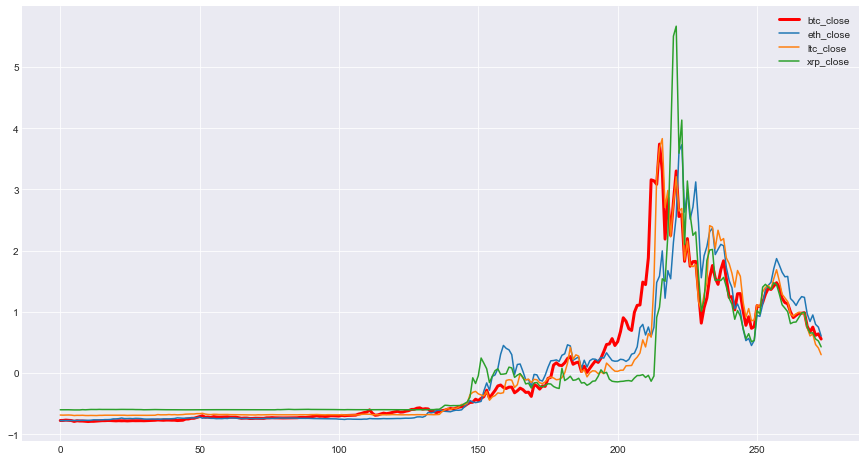

In [11]:
scaler = prep.MinMaxScaler()
scaler = prep.StandardScaler()
interval_start = 0
interval_end = data
fields = ['btc_close', 'eth_close', 'ltc_close', 'xrp_close']
#fields = ['btc_close', 'market-cap', 'hash-rate', 'transaction-fees-usd']
#fields = ['btc_close', 'vader_sent', 'lex_sent', 'cnn_sent']
scaled = scaler.fit_transform(data[fields])
print(scaled.shape)

skip = 20
#skip = 1

sns.set_style("darkgrid")
plt.figure(figsize=(15, 8))
for idx, field in enumerate(fields):
    if idx == 0:
        plt.plot(scaled[::skip,idx], 'r', label=field, linewidth=3)
    else:
        plt.plot(scaled[::skip,idx], label=field)
plt.legend(loc='best')
plt.show()

# Google Trends & Price

In [12]:
data.query('date == 1479596400')

,btc_close,btc_quoteVolume,btc_volume,eth_close,eth_quoteVolume,eth_volume,ltc_close,ltc_quoteVolume,ltc_volume,xrp_close,...,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,market-cap,median-confirmation-time,transaction-fees-usd,transaction-fees,transactions-per-second,round_interval
93289,751.880076,0.066888,50.293385,9.652031,0.09296,0.897254,3.914526,0.0,0.0,0.007689,...,0.957716,4.992734,2.818009e+11,1.807084e+06,1.167835e+10,11.15,53800.797764,73.701742,2.65,True


In [41]:
def to_timestamp(dates):
    return [int(time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())) for s in dates]

trends = pd.read_csv('data\google-trends\multiTimeline.csv')
trends['date'] = to_timestamp(trends['Week'])
#trends
total = pd.merge(trends, data[['btc_close', 'date']], how='inner', left_on='date', right_on='date')

total.corr()

,bitcoin,date,btc_close
bitcoin,1.000000,0.636103,0.861710
date,0.636103,1.000000,0.828573
btc_close,0.861710,0.828573,1.000000


(74, 2)


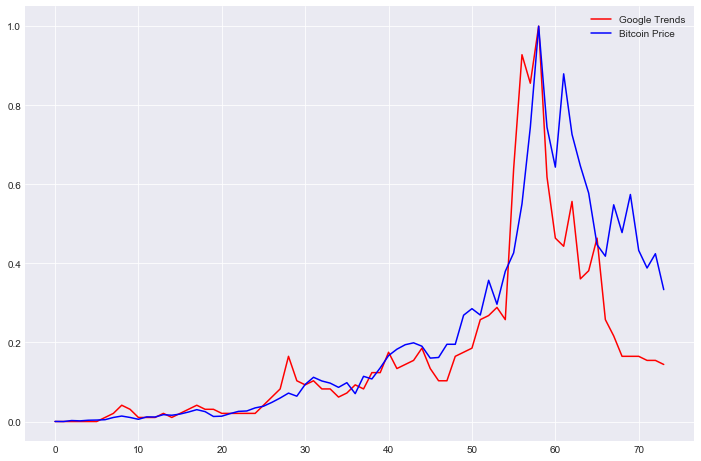

In [61]:

scaler = prep.MinMaxScaler()
#scaler = prep.StandardScaler()
scaled = scaler.fit_transform(total[['bitcoin', 'btc_close']])
print(scaled.shape)

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(scaled[:,0], 'r', label='Google Trends')
plt.plot(scaled[:,1], 'b', label='Bitcoin Price')
#plt.plot(total['bitcoin'])
#plt.plot(total['btc_close'])
plt.legend(loc='best')
plt.show()